Data Setup & Preprocessing

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("GlobalWeatherRepository.csv")
print("Shape:", df.shape)
df.head()

Shape: (60218, 41)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [2]:

from sklearn.preprocessing import StandardScaler  # or MinMaxScaler

# Load the dataset
df = pd.read_csv("GlobalWeatherRepository.csv")
print("Original Shape:", df.shape)

# Overview of missing data
missing = df.isnull().sum()

# Drop columns with >40% missing values
threshold = 0.4
df = df.loc[:, df.isnull().mean() < threshold]

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Remove outliers using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape after removing outliers:", df_no_outliers.shape)

# Normalize numeric columns
scaler = StandardScaler()  # or MinMaxScaler()
df_scaled = df_no_outliers.copy()
df_scaled[num_cols] = scaler.fit_transform(df_no_outliers[num_cols])

# Print basic info and normalized data
print("\nDataFrame Info:")
df_scaled.info()

print("\nSummary Statistics:")
print(df_scaled.describe())

print("\nNormalized Data (first 10 rows):")
print(df_scaled[num_cols].head(10))

# Optional: check remaining missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nRemaining Missing Values:\n", missing)


Original Shape: (60218, 41)
Shape after removing outliers: (25425, 41)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 25425 entries, 0 to 60217
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       25425 non-null  object 
 1   location_name                 25425 non-null  object 
 2   latitude                      25425 non-null  float64
 3   longitude                     25425 non-null  float64
 4   timezone                      25425 non-null  object 
 5   last_updated_epoch            25425 non-null  float64
 6   last_updated                  25425 non-null  object 
 7   temperature_celsius           25425 non-null  float64
 8   temperature_fahrenheit        25425 non-null  float64
 9   condition_text                25425 non-null  object 
 10  wind_mph                      25425 non-null  float64
 11  wind_kph                      25425 

In [3]:
# Basic summary of key features
features = ['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph', 'pressure_mb']
df_scaled[features].describe()


,temperature_celsius,precip_mm,humidity,wind_kph,pressure_mb
count,2.542500e+04,2.542500e+04,2.542500e+04,2.542500e+04,2.542500e+04
mean,-8.719344e-17,-1.117865e-17,-3.577167e-17,-1.833298e-16,-9.932228e-15
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-3.068119e+00,-3.981607e-01,-2.404597e+00,-1.305956e+00,-2.796826e+00
25%,-4.873556e-01,-3.981607e-01,-7.738318e-01,-8.277179e-01,-5.861169e-01
50%,2.210892e-01,-3.981607e-01,1.273808e-01,-1.634977e-01,-3.343960e-02
75%,6.512164e-01,-3.981607e-01,8.140190e-01,7.531262e-01,5.192377e-01
max,2.738598e+00,4.630055e+00,1.801061e+00,2.998190e+00,2.729947e+00


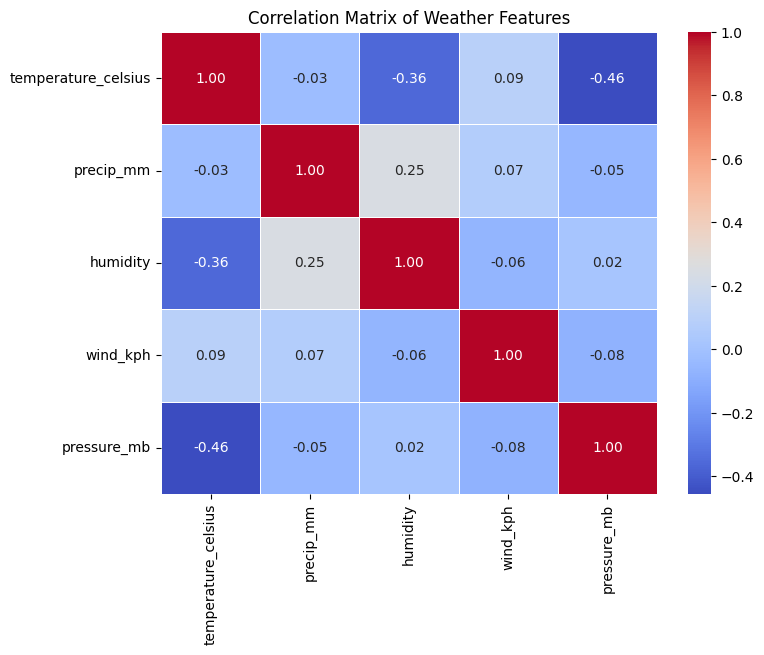

In [4]:
df_scaled[['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph', 'pressure_mb']].describe()
import seaborn as sns
import matplotlib.pyplot as plt

# Focused numeric features
features = ['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph', 'pressure_mb']
corr = df_scaled[features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Weather Features")
plt.show()


C:\Users\Emil Saj Abraham\AppData\Local\Temp\ipykernel_20032\2630827648.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trends = df_time[features].resample('M').mean()


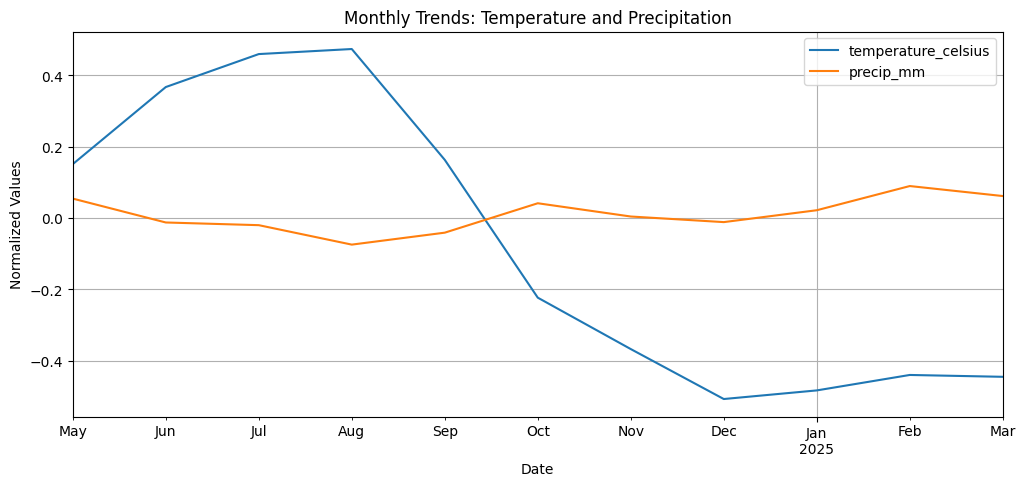

In [5]:
# Ensure datetime
df_scaled['last_updated'] = pd.to_datetime(df_scaled['last_updated'])
df_time = df_scaled.set_index('last_updated')

# Monthly averages
monthly_trends = df_time[features].resample('M').mean()
monthly_trends[['temperature_celsius', 'precip_mm']].plot(figsize=(12, 5), grid=True)
plt.title("Monthly Trends: Temperature and Precipitation")
plt.xlabel("Date")
plt.ylabel("Normalized Values")
plt.show()



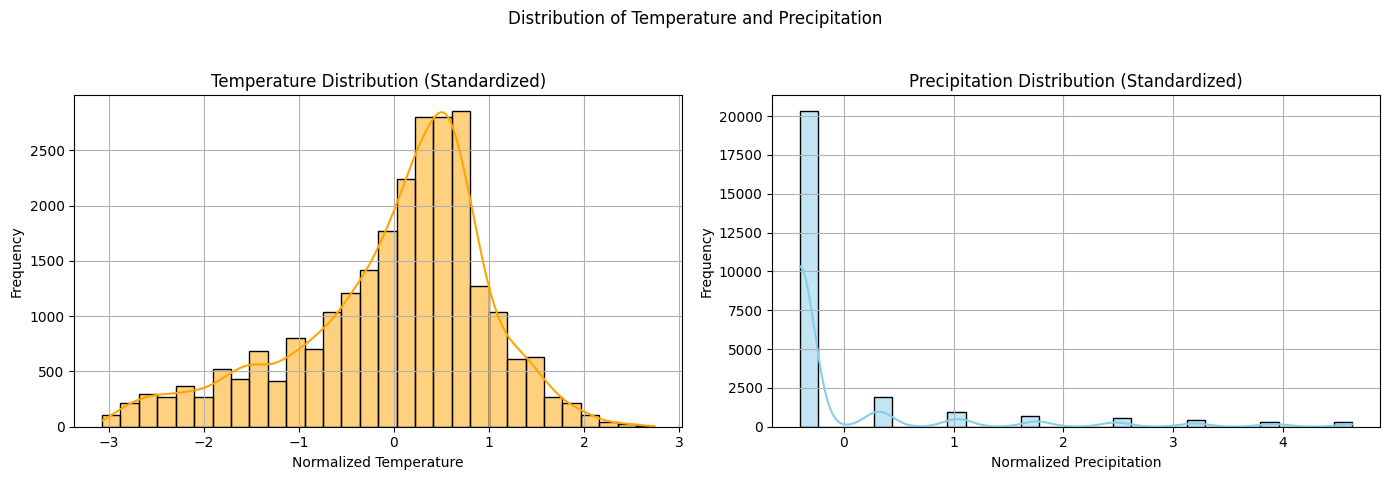

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Temperature distribution
sns.histplot(df_scaled['temperature_celsius'], bins=30, kde=True, color='orange', ax=axes[0])
axes[0].set_title("Temperature Distribution (Standardized)")
axes[0].set_xlabel("Normalized Temperature")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Precipitation distribution
sns.histplot(df_scaled['precip_mm'], bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title("Precipitation Distribution (Standardized)")
axes[1].set_xlabel("Normalized Precipitation")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

# Overall layout
plt.suptitle("Distribution of Temperature and Precipitation")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Model Building

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare data for VAR
df_scaled['last_updated'] = pd.to_datetime(df_scaled['last_updated'])
df_scaled = df_scaled.sort_values('last_updated')
df_scaled.set_index('last_updated', inplace=True)

# Use only relevant columns
var_data = df_scaled[['temperature_celsius', 'precip_mm']]

# Split into train and test
split_index = int(len(var_data) * 0.8)
train, test = var_data[:split_index], var_data[split_index:]

# Fit VAR model
model = VAR(train)
model_fitted = model.fit(maxlags=15, ic='aic')

# Forecast
lag_order = model_fitted.k_ar
forecast_input = train.values[-lag_order:]
forecast = model_fitted.forecast(y=forecast_input, steps=len(test))

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['temperature_celsius_pred', 'precip_mm_pred'])

# Evaluation
def evaluate(y_true, y_pred, label=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"\n🔍 Evaluation for {label}")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²:   {r2:.4f}")

evaluate(test['temperature_celsius'], forecast_df['temperature_celsius_pred'], label='Temperature')
evaluate(test['precip_mm'], forecast_df['precip_mm_pred'], label='Precipitation')

# Optional: Plot results
forecast_df[['temperature_celsius_pred']].plot(label='Forecast', figsize=(12,5))
test[['temperature_celsius']].plot(label='Actual')
plt.title('Temperature Forecast vs Actual')
plt.legend()
plt.show()

forecast_df[['precip_mm_pred']].plot(label='Forecast', figsize=(12,5))
test[['precip_mm']].plot(label='Actual')
plt.title('Precipitation Forecast vs Actual')
plt.legend()
plt.show()


KeyError: 'last_updated'

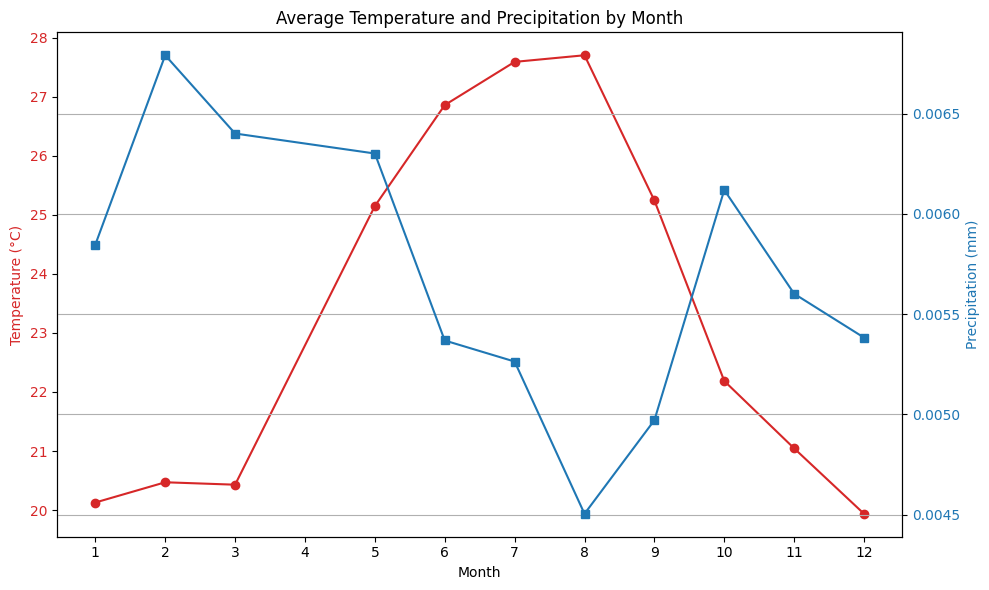

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
monthly_data = df_no_outliers.copy()
monthly_data['last_updated'] = pd.to_datetime(monthly_data['last_updated'])
monthly_data['month'] = monthly_data['last_updated'].dt.month

# Group by month
monthly_avg = monthly_data.groupby('month').agg({
    'temperature_celsius': 'mean',
    'precip_mm': 'mean'
})

# Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (°C)', color=color1)
ax1.plot(monthly_avg.index, monthly_avg['temperature_celsius'], marker='o', color=color1, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color1)

# Second y-axis for precipitation
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Precipitation (mm)', color=color2)
ax2.plot(monthly_avg.index, monthly_avg['precip_mm'], marker='s', color=color2, label='Precipitation')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Average Temperature and Precipitation by Month")
plt.xticks(range(1,13))
fig.tight_layout()
plt.grid(True)
plt.show()


Evaluation

In [ ]:
actual = merged['y']
predicted = merged['yhat']

# Handle MAPE safely
nonzero_actual = actual != 0
mape = np.mean(np.abs((actual[nonzero_actual] - predicted[nonzero_actual]) / actual[nonzero_actual])) * 100 if np.any(nonzero_actual) else np.nan

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)

# Print results
print(f"MAE  (Mean Absolute Error):            {mae:.4f}")
print(f"RMSE (Root Mean Squared Error):       {rmse:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print(f"R²   (Coefficient of Determination):  {r2:.4f}")


MAE  (Mean Absolute Error):            6.3885
RMSE (Root Mean Squared Error):       7.4720
MAPE (Mean Absolute Percentage Error): 49.92%
R²   (Coefficient of Determination):  0.1726
